# Matplotlib

Método Orientado a Objetos

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.
* https://matplotlib.org/stable/api/ticker_api.html

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

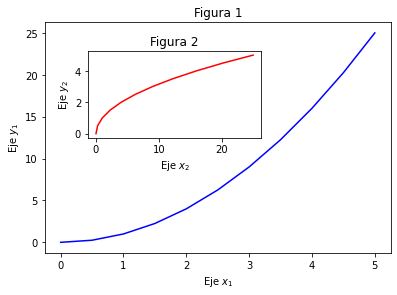

In [11]:
## Ejemplo 1:

fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # eje principal
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # figura dentro de la otra

axes1.plot(x, y, 'b')
axes1.set_xlabel(r'Eje $x_{1}$') ## insert LaTex
axes1.set_ylabel(r'Eje $y_{1}$')
axes1.set_title('Figura 1')

axes2.plot(y, x, 'r')
axes2.set_xlabel(r'Eje $x_{2}$')
axes2.set_ylabel(r'Eje $y_{2}$')
axes2.set_title('Figura 2');

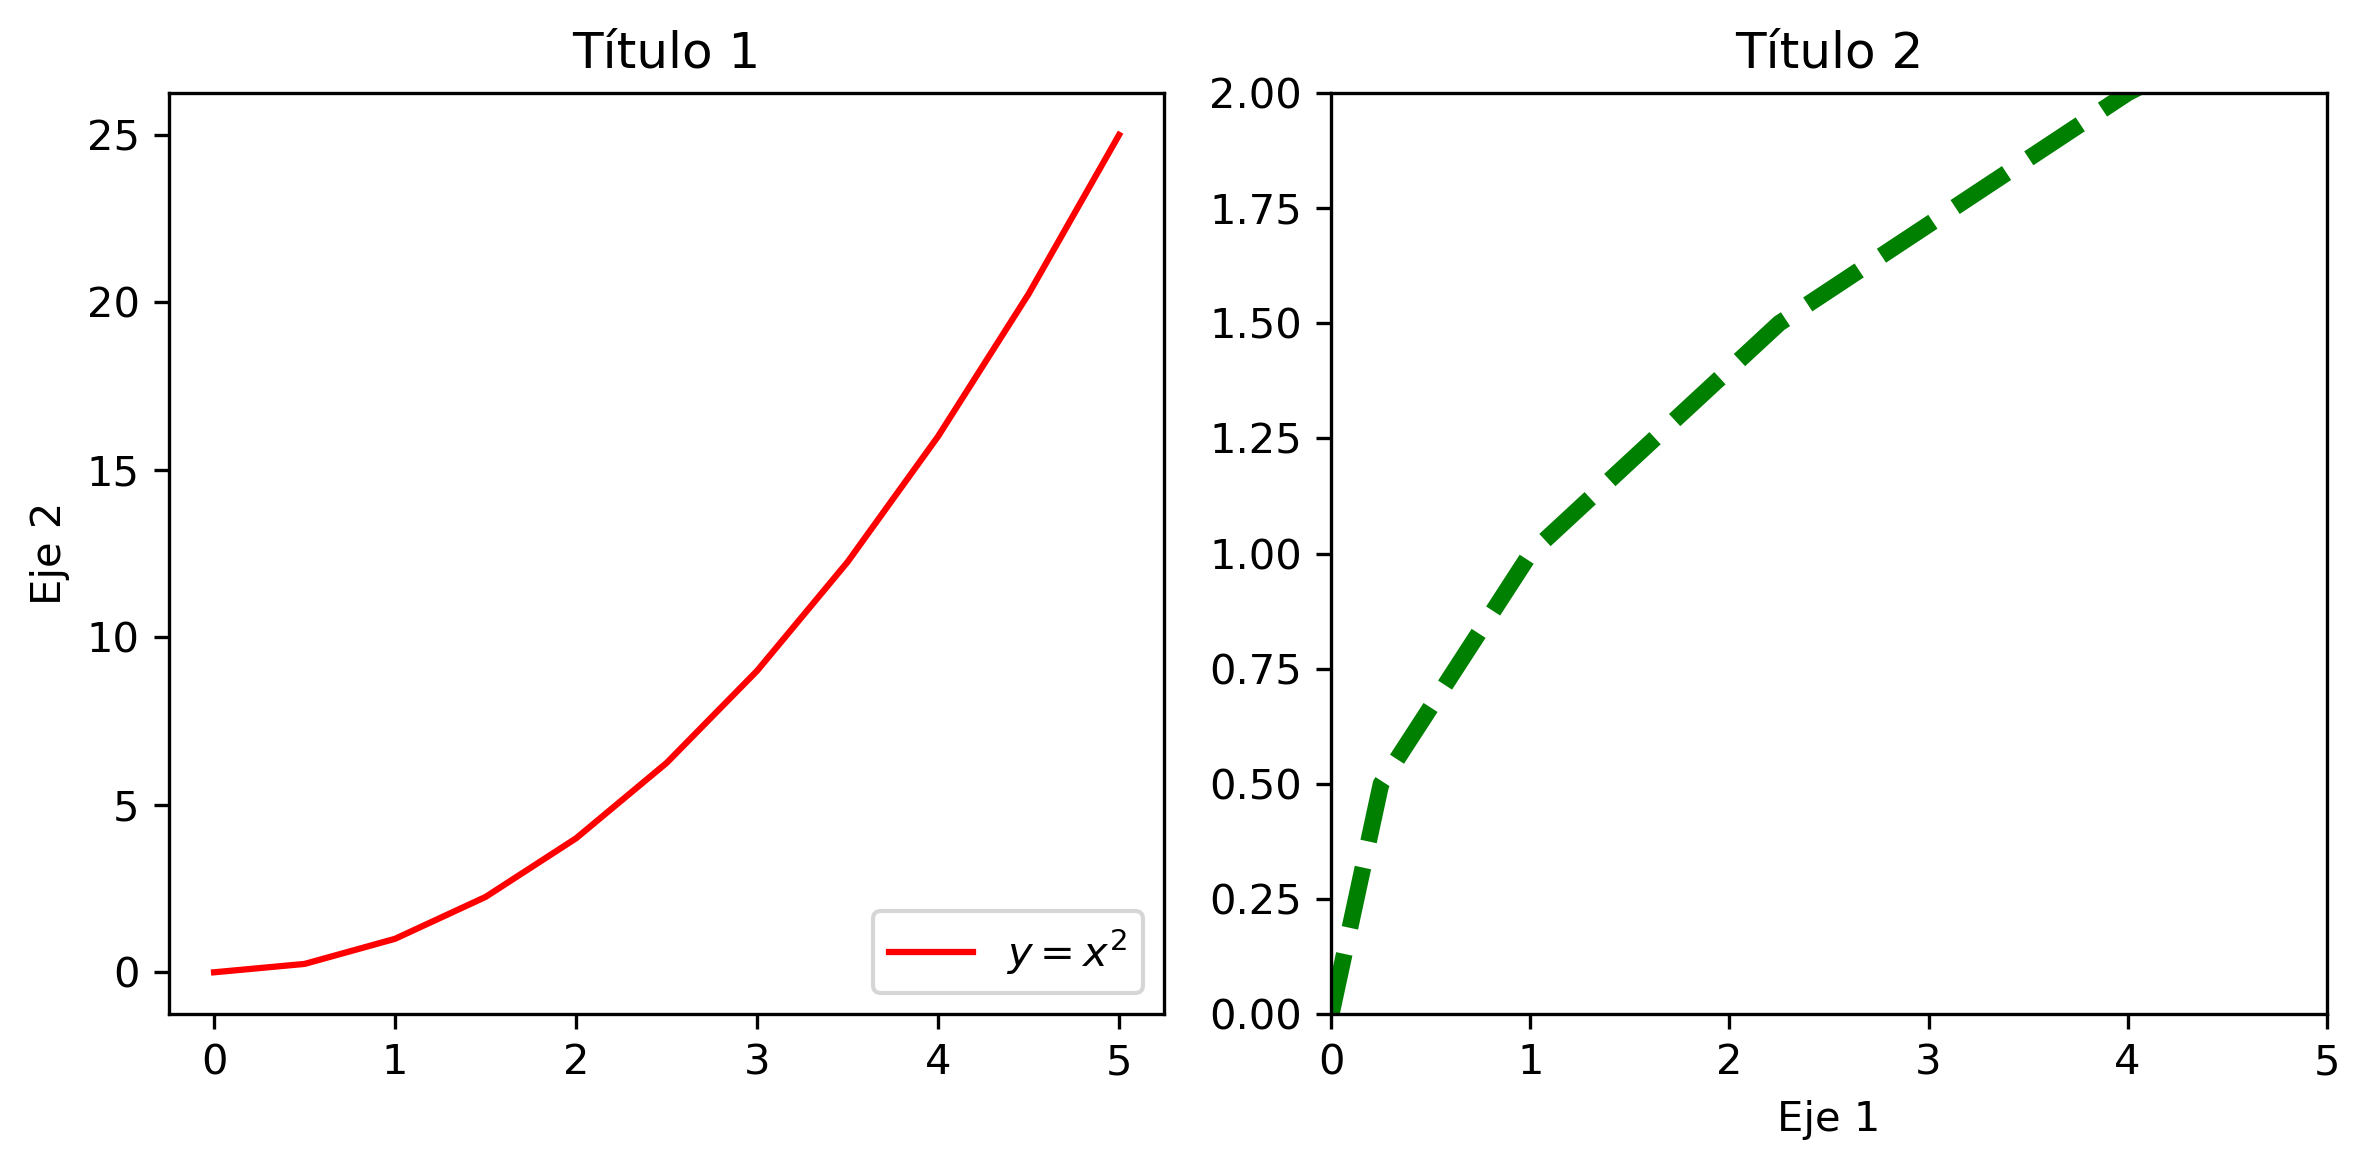

In [35]:
## Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (8,4), dpi = 300)
axes[0].plot(x,y, label = r'$y = x^{2}$', color = 'r')
axes[1].plot(y,x, 'g--', linewidth = 4, label = 'Ejes Modificados')

## Personalización
axes[0].set_title('Título 1')
axes[0].set_ylabel('Eje 2')
axes[0].legend(loc = 4)

axes[1].set_xlabel('Eje 1')
axes[1].set_title('Título 2')
axes[1].set_ylim([0, 2])
axes[1].set_xlim([0, 5])


fig.tight_layout() ## ajuste del espacio
fig.savefig('Ejercicio2.png', dpi = 300) # puede ser pdf, jpg,eps,svg,pgf

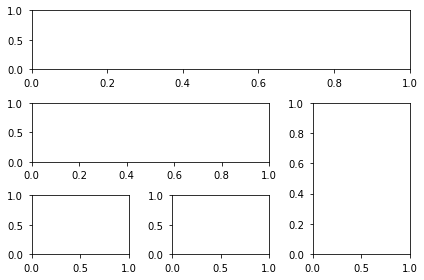

In [70]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

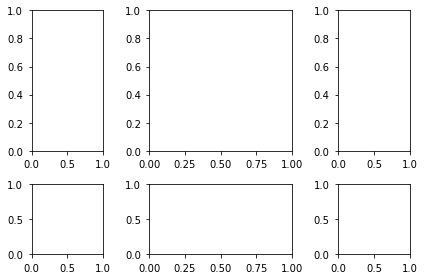

In [71]:
import matplotlib.gridspec as gridspec
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

* Otros Tipos de Gráficos

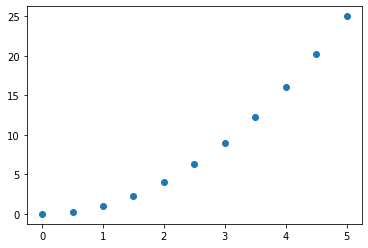

In [39]:
# Scatter plot
## para estudiar relaciones entre variables
plt.scatter(x,y)

(array([3., 2., 5., 3., 4., 6., 5., 5., 5., 4., 4., 2., 6., 0., 1., 5., 0.,
        2., 1., 0., 2., 5., 4., 5., 3., 4., 3., 1., 6., 4.]),
 array([ 10. ,  42.7,  75.4, 108.1, 140.8, 173.5, 206.2, 238.9, 271.6,
        304.3, 337. , 369.7, 402.4, 435.1, 467.8, 500.5, 533.2, 565.9,
        598.6, 631.3, 664. , 696.7, 729.4, 762.1, 794.8, 827.5, 860.2,
        892.9, 925.6, 958.3, 991. ]),
 <BarContainer object of 30 artists>)

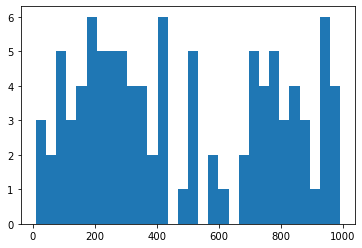

In [42]:
#Histograma

from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data, bins = 30)

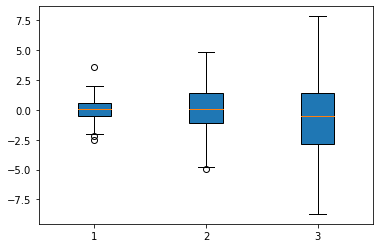

In [43]:
# rectangular box plot

data = [np.random.normal(0, std, 100) for std in range(1, 4)]
plt.boxplot(data,vert=True,patch_artist=True);

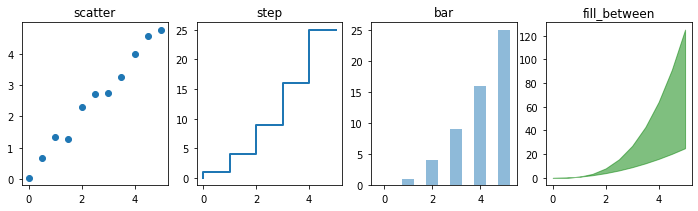

In [69]:
n = np.array([0,1,2,3,4,5])
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(x, x + 0.25*np.random.randn(len(x)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

<ipython-input-81-8e77a1d73da3>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap= plt.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())


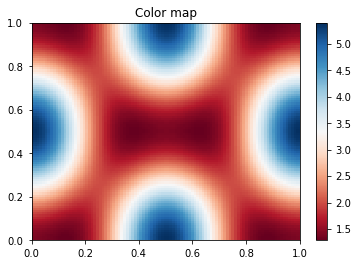

In [81]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap= plt.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
ax.set_title('Color map')
plt.show()

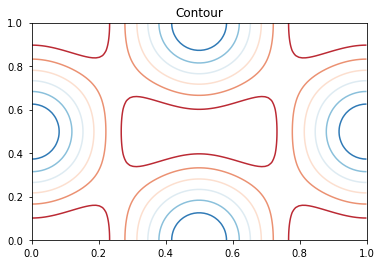

In [83]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap = plt.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
ax.set_title('Contour')
plt.show()

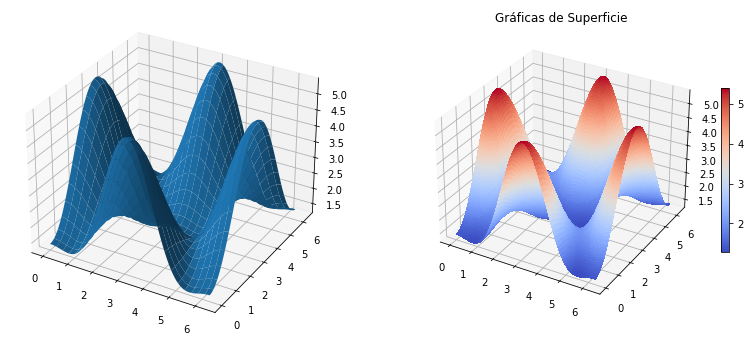

In [88]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)
ax.set_title('Gráficas de Superficie')
plt.show()

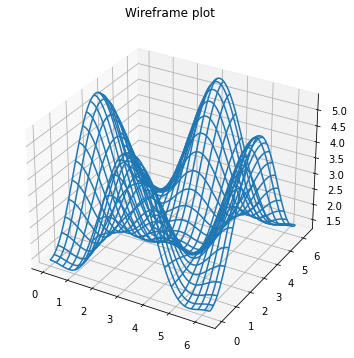

In [90]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
ax.set_title('Wireframe plot')
plt.show()

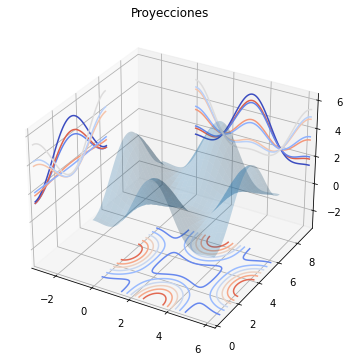

In [93]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap = plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap = plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap = plt.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);
ax.set_title('Proyecciones')
plt.show()

* Ajustes Extras 

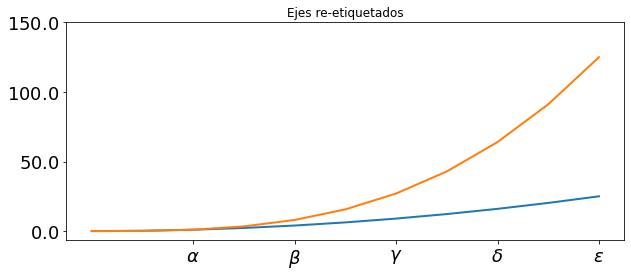

In [48]:
# Re-etiquetar ejes

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x, x**2, x, x**3, lw=2)
ax.set_title('Ejes re-etiquetados')
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

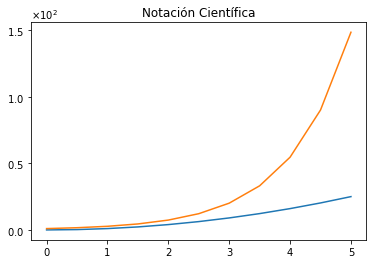

In [50]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("Notación Científica")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

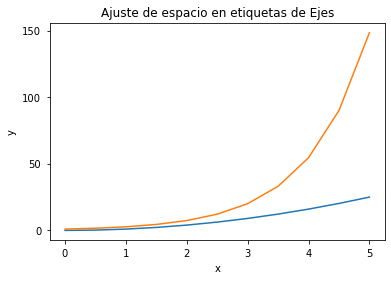

In [55]:
plt.rcParams['xtick.major.pad'] = 5
plt.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("Ajuste de espacio en etiquetas de Ejes")

#espacios
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");

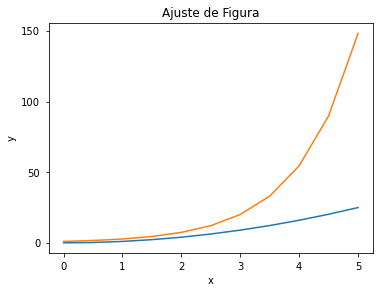

In [56]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("Ajuste de Figura")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

Text(0.5, 1.0, 'Grid Personalizada')

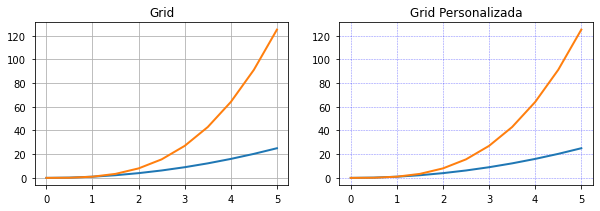

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)
axes[0].set_title('Grid')

axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[1].set_title('Grid Personalizada')

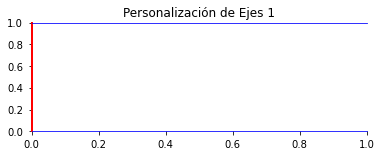

In [62]:
fig, ax = plt.subplots(figsize=(6,2))
ax.set_title('Personalización de Ejes 1')
ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left 

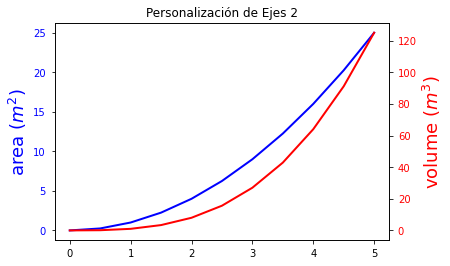

In [67]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")

ax1.set_title('Personalización de Ejes 2')
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

Text(0.5, 1.0, 'Mueve loc de Ejes')

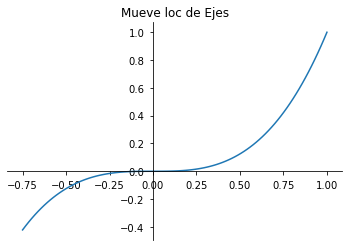

In [68]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);
ax.set_title('Mueve loc de Ejes')

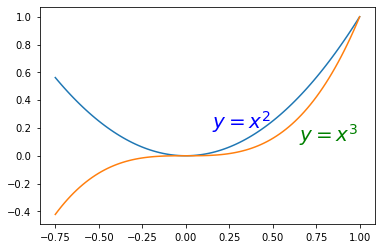

In [73]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green")
plt.show()